# Classification

## Load and analyse data

In [1]:
'''
a) Analyze the data by using Python code and answer the following questions by printing 
to the console:
• How many examples are contained in this dataset? How many attributes 
are contained? What are the attribute names? What datatypes do the 
individual attributes have?
• Pick out the values of the attribute “ash”: What is the maximum, 
minimum, median, and mean value for this attribute?
• Look at the label attribute: How many classes does this attribute have? 
How many examples are associated to each of the classes?
b) Use matplotlib to visualize the data:
• Again, take the attribute “ash” and visualize the values as a discrete 
histogram. Assume a number of 10 bins for the visualization. Display the 
value range of each bin on the x-axis of the plot.
• Additionally, visualize the data of the attribute “ash” in a boxplot. What 
does this say about the data range?
'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
#load wine dataset
wine = load_wine(as_frame=True)
print(wine.DESCR) #print description of the dataset
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [2]:
print(f"\nNumber of classes: {wine['target_names'].shape[0]}")
print(f"Classes: {wine['target_names']}")
print(f"Number of examples associated to each class: {wine['target'].value_counts()}")



Number of classes: 3
Classes: ['class_0' 'class_1' 'class_2']
Number of examples associated to each class: 1    71
0    59
2    48
Name: target, dtype: int64


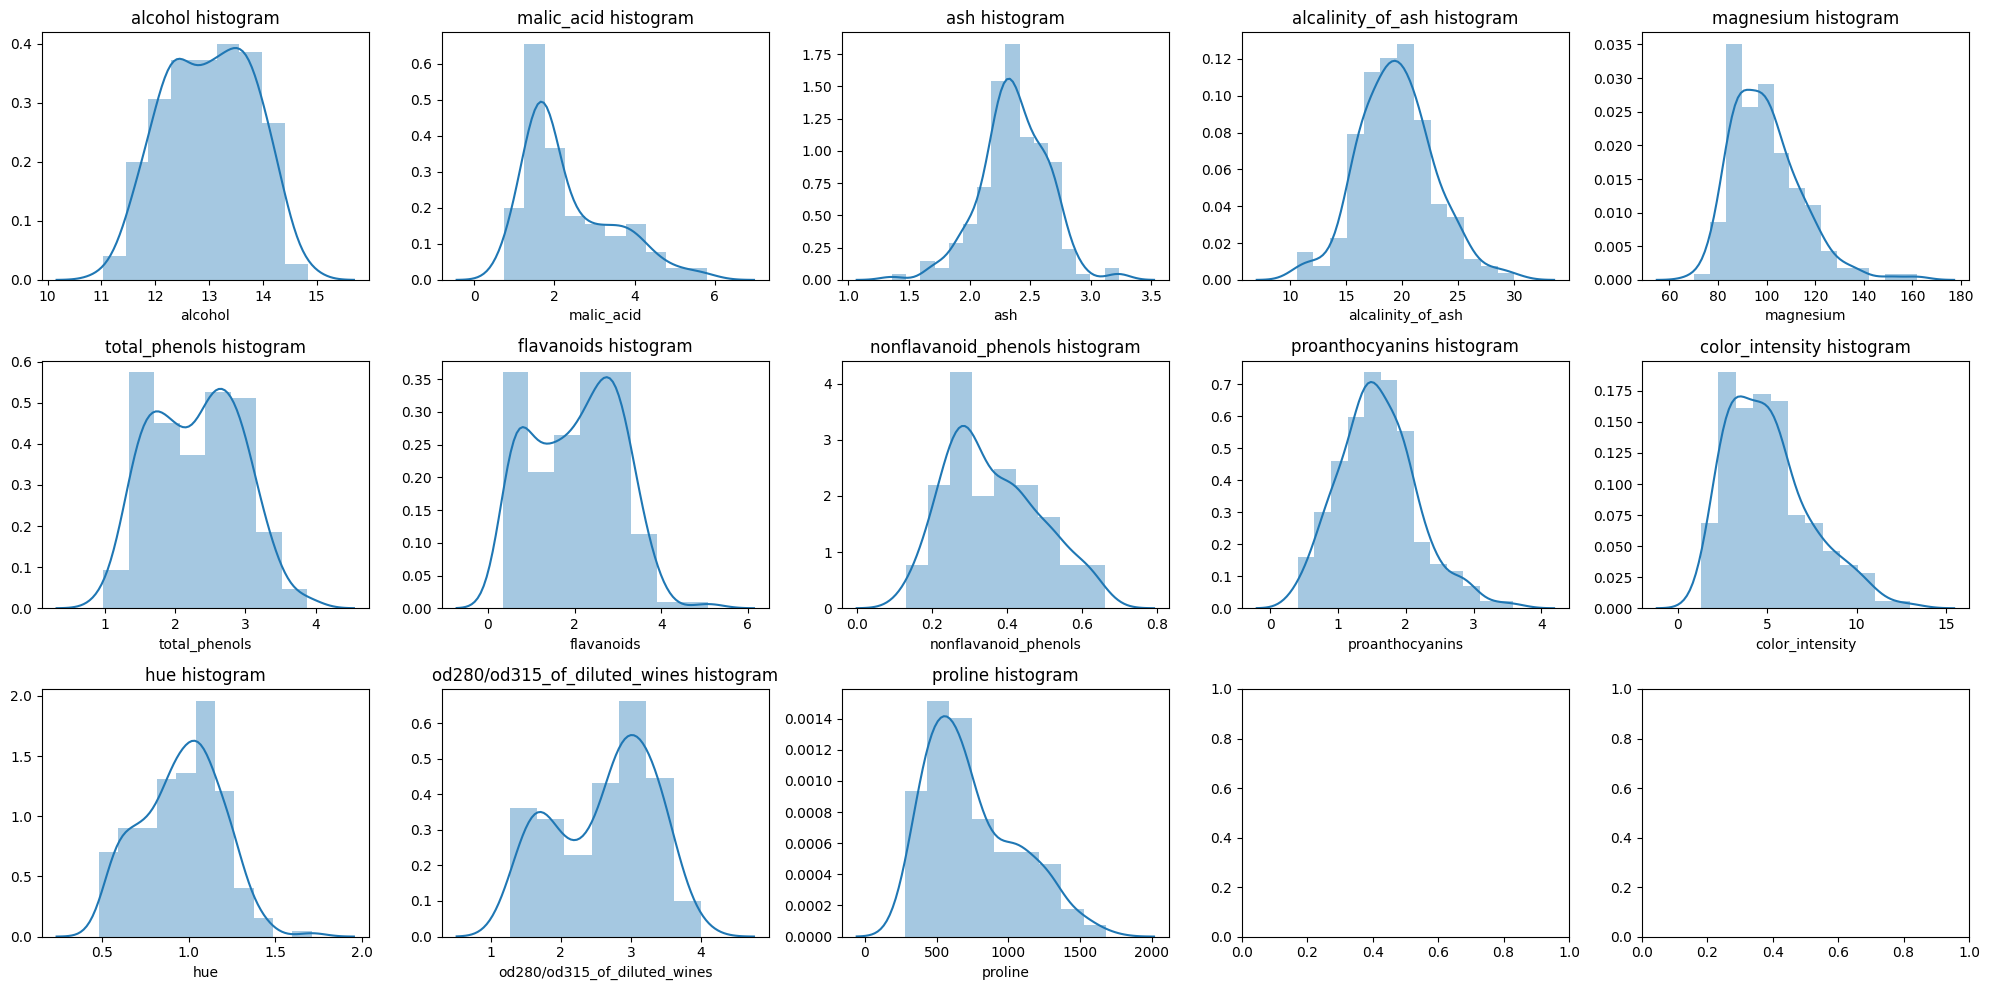

In [3]:
# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))  # Adjust the nrows and ncols as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each histogram in a subplot
for i, column in enumerate(wine['data'].columns):
    sns.distplot(wine['data'][column], kde=True, ax=axes[i])
    axes[i].set_title(f"{column} histogram")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

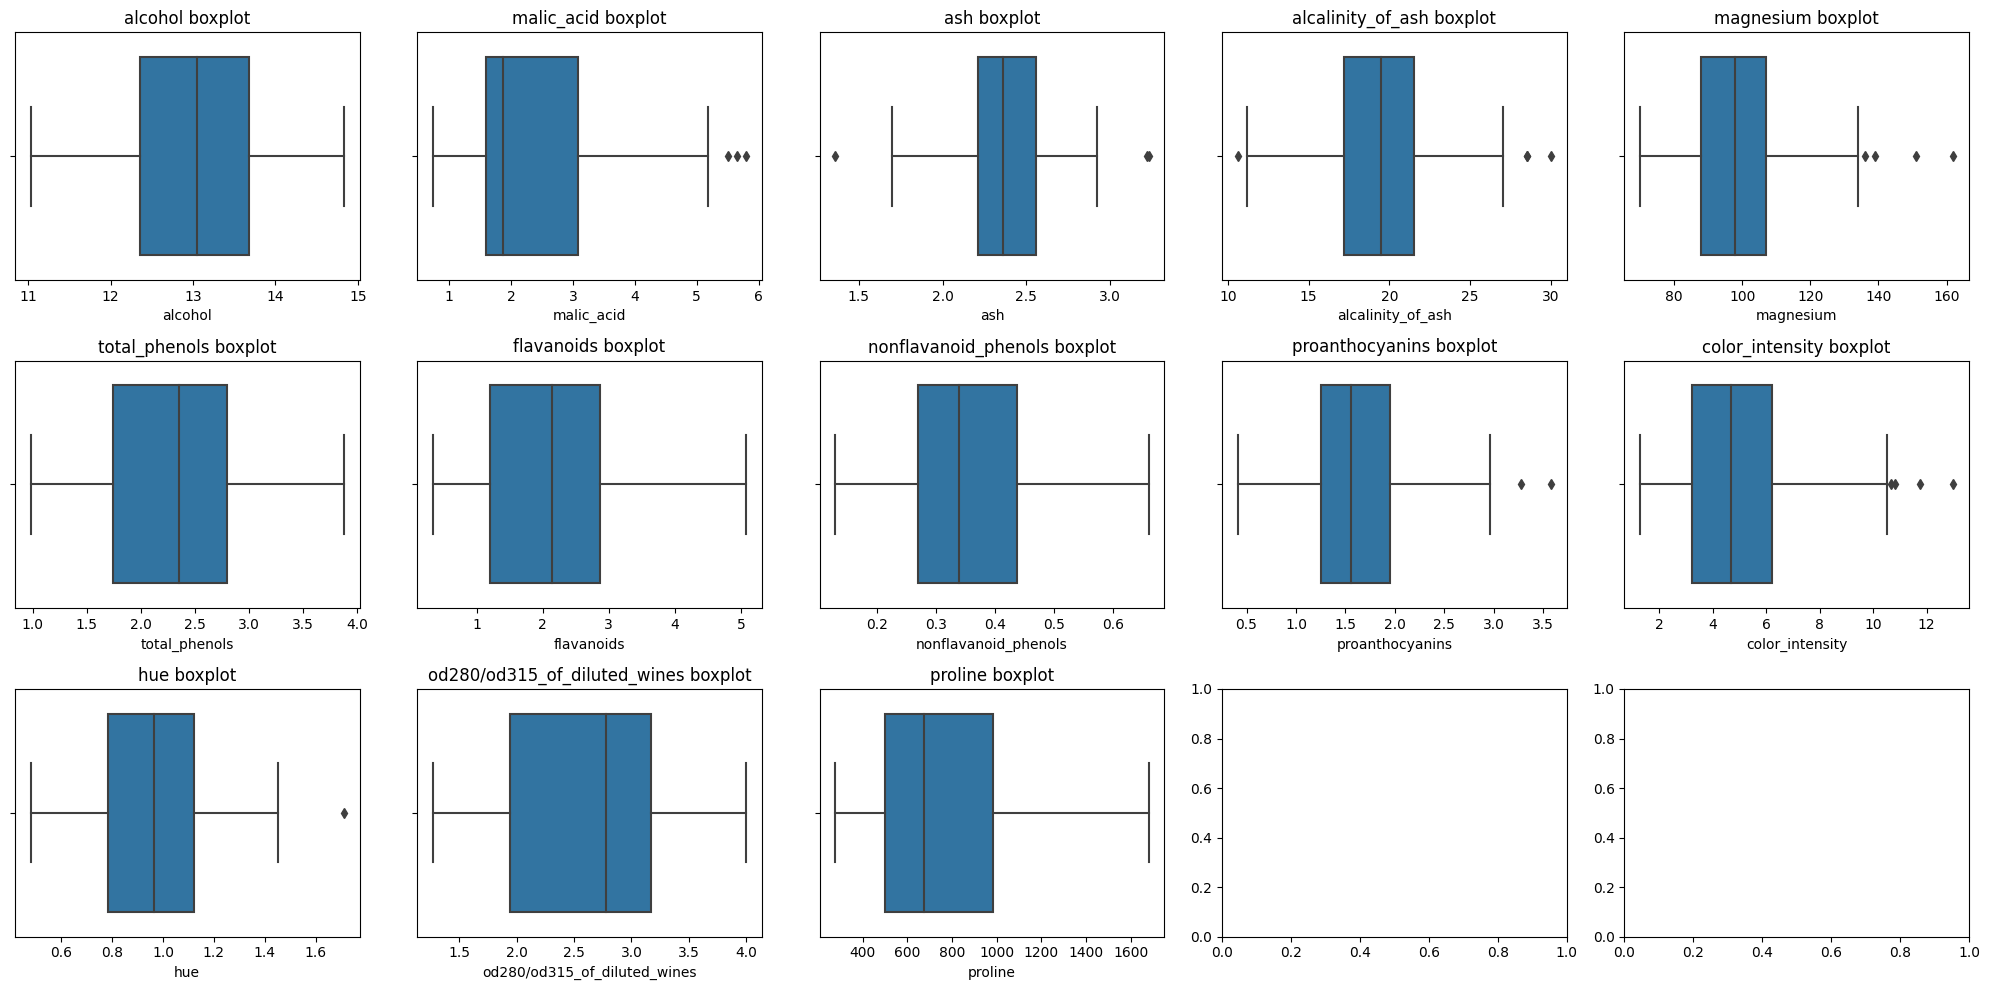

In [4]:
# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each histogram in a subplot
for i, column in enumerate(wine['data'].columns):
    sns.boxplot(x=wine['data'][column], ax=axes[i])
    axes[i].set_title(f"{column} boxplot")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

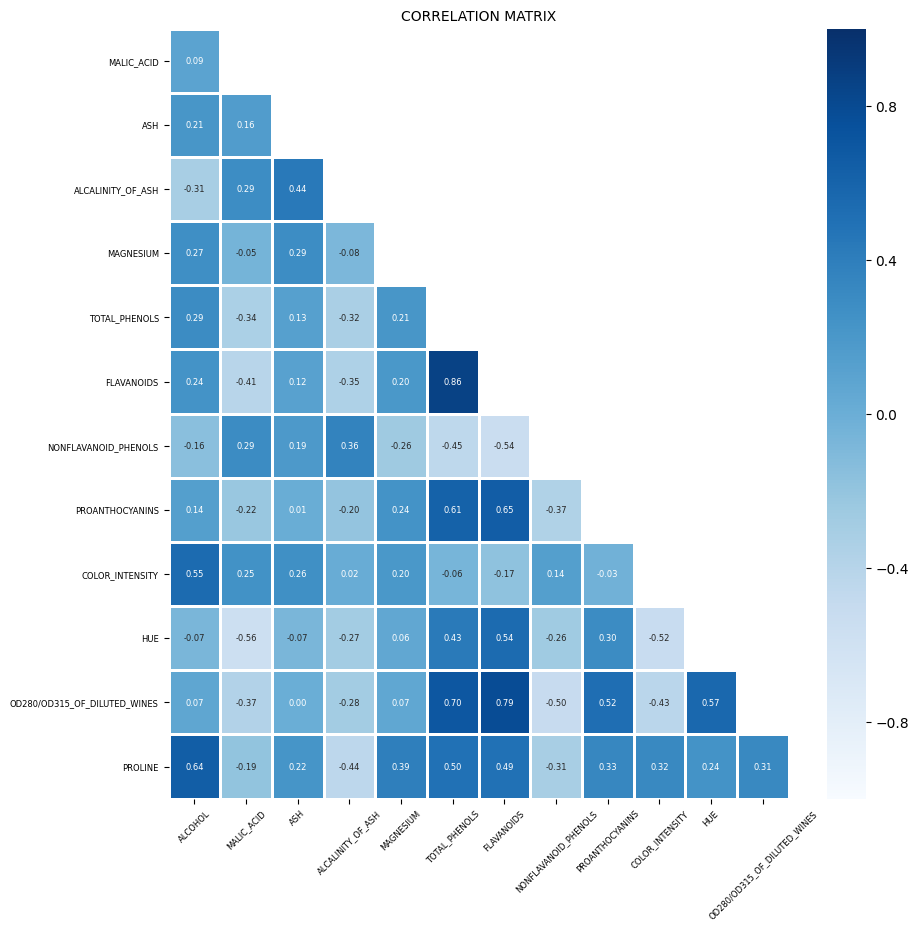

In [5]:
# Attributes correlation
data_corr=wine['data'].corr()
ones_corr=np.ones_like(data_corr,dtype=bool)
mask=np.triu(ones_corr)
adjusted_mask=mask[1:,:-1]
adjusted_mask
adjusted_data_corr=data_corr.iloc[1:,:-1]
fig, ax = plt.subplots(figsize=(10, 10))

# Create the heatmap with smaller font size for annotations
sns.heatmap(data=adjusted_data_corr, cmap="Blues", mask=adjusted_mask,
            annot=True, fmt=".2f",
            annot_kws={"size": 6},  # Set font size for annotations
            vmin=-1, vmax=1,
            linecolor="white", linewidths=1)

# Set y and x tick labels
yticks = [i.upper() for i in adjusted_data_corr.index]
xticks = [i.upper() for i in adjusted_data_corr.columns]
ax.set_yticklabels(yticks, rotation=0)
ax.set_xticklabels(xticks, rotation=45)
ax.set_yticklabels(yticks, rotation=0, fontsize=6)  # Set font size for y-axis labels
ax.set_xticklabels(xticks, rotation=45, fontsize=6)  # Set font size for x-axis labels

# Set the title
title = "CORRELATION MATRIX"
ax.set_title(title, loc='center', fontsize=10)

# Show the plot
plt.show()

## Data preparation

In [30]:
'''
a) Create a new attribute:
• Create a new attribute “substracted_phenols” by subtracting the values of 
“nonflavanoid_phenols” from the values of “total_phenols”.
• Increase all values of the attribute “alcohol” by 1.0.

b) Data augmentation:
• Shuffle the data.
• Augment the dataset by creating 20 more examples that are derived from real 
examples. Therefore, select 20 random examples from the original dataset and
apply Gaussian noise (mean = 0 and std. dev. = 1) to those examples. Finally, 
add the examples to the dataset.

c) Training preparation:
• Scale the data of the attribute “ash” to the range [0,1] with one of the scalers 
of scikit-learn.?
'''
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Part (a): Create a new attribute
#Create a new attribute “substracted_phenols”
wine_df_modified = wine_df.copy()
wine_df_modified['subtracted_phenols'] = wine_df_modified['total_phenols'] - wine_df_modified['nonflavanoid_phenols']
#Increase all values of the attribute “alcohol” by 1.0.
wine_df_modified['alcohol'] += 1.0

# Part (b): Data augmentation
#shuffle the data
wine_df_modified = shuffle(wine_df_modified, random_state=42)
# Augment the dataset by adding Gaussian noise to 20 random examples
n_samples_to_augment = 20
random_indices = np.random.choice(wine_df_modified.index, n_samples_to_augment, replace=False)
augmented_data = wine_df_modified.loc[random_indices].copy()
# Apply Gaussian noise (mean=0, std. dev=1)
noise = np.random.normal(0, 1, augmented_data.iloc[:, :-1].shape)
augmented_data.iloc[:, :-1] += noise  # Exclude the target column from noise addition
# Add the augmented examples to the dataset
wine_df_modified = pd.concat([wine_df_modified, augmented_data], ignore_index=True)

# Part (c): Training preparation
# Scale the data of the attribute "ash" to the range [0,1]
scaler = MinMaxScaler()
wine_df_modified['ash'] = scaler.fit_transform(wine_df_modified[['ash']])


## Implement classification models

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay,precision_score, recall_score, f1_score
from sklearn import svm, tree

'''a) Take the original wine data from the first example: 
• Transform the problem to a binary classification task by combining labels of 
class 1 and 2. Name the resulting labels class-0 and not-class-0. 
• Split the original data in a training set and a test set with a training ratio of 
0.85.
• After that, train a classifier of your choice with the training data. 
• Finally, compute the accuracy of this classifier with the examples from the test 
set and compute the confusion matrix.
• Give a short remark on the performance of this classifier by interpreting the 
metrics. 
b) Take the modified wine data that was created in Exercise 2: 
• Repeat all steps from Exercise 3 a) with the modified wine data
• Compare the performance of both trained models in some short sentences. 
Was the data transformation in Exercise 2 helpful? Does a comparison make 
sense?'''


# Transform the problem to binary classification
# Combine labels of class 1 and 2 into one label called "not-class-0"
wine_df['binary_target'] = wine_df['target'].apply(lambda x: 0 if x == 0 else 1)
wine_df_modified['binary_target'] = wine_df_modified['target'].apply(lambda x: 0 if x == 0 else 1)

# Split the data into training and test sets (85% training, 15% test)
X_train, X_test, y_train, y_test = train_test_split(
    wine_df.drop(columns=['target', 'binary_target']), 
    wine_df['binary_target'], 
    test_size=0.15, 
    random_state=42
)

X_train_modified, X_test_modified, y_train_modified, y_test_modified = train_test_split(
    wine_df_modified.drop(columns=['target', 'binary_target']), 
    wine_df_modified['binary_target'], 
    test_size=0.15, 
    random_state=42
)

# Train a classifier (Random Forest)
classifier = tree.DecisionTreeClassifier(random_state=42)
classifier_modified = tree.DecisionTreeClassifier(random_state=42)

classifier.fit(X_train, y_train)
classifier_modified.fit(X_train_modified, y_train_modified)

# Evaluate the classifier
y_pred = classifier.predict(X_test)
y_pred_modified = classifier_modified.predict(X_test_modified)

accuracy = accuracy_score(y_test, y_pred)
accuracy_modified = accuracy_score(y_test_modified, y_pred_modified)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_modified = confusion_matrix(y_test_modified, y_pred_modified)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

precision_modified = precision_score(y_test_modified, y_pred_modified)
recall_modified = recall_score(y_test_modified, y_pred_modified)
accuracy_modified = accuracy_score(y_test_modified, y_pred_modified)

print(f"Precision: {precision:.2f}, Modified Precision: {precision_modified:.2f}")
print(f"Recall: {recall:.2f}, Modified Recall: {recall_modified:.2f}")
print(f"Accuracy: {accuracy:.2f}, Modified Accuracy: {accuracy_modified:.2f}")
print(f"\nConfusion Matrix:\n{conf_matrix}, \nConfusion matrix - modified:\n {conf_matrix_modified}" )



Precision: 1.00, Modified Precision: 0.94
Recall: 0.94, Modified Recall: 0.94
Accuracy: 0.96, Modified Accuracy: 0.93

Confusion Matrix:
[[ 9  0]
 [ 1 17]], 
Confusion matrix - modified:
 [[11  1]
 [ 1 17]]
